# Salary Prediction Model Training

### Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Step 2: Load and Explore Data

In [2]:
df = pd.read_csv('salary_data.csv')

print("Dataset Shape:",df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (1000, 6)

First few rows:
   Years_of_Experience          Job_Title Education_Level   Location  \
0                    6       Data Analyst     High School     Mumbai   
1                   19      Web Developer        Master's  Hyderabad   
2                   14        ML Engineer     High School     Mumbai   
3                   10       Data Analyst        Master's     Mumbai   
4                    7  Backend Developer             PhD      Delhi   

     Industry  Salary_INR  
0  Healthcare      535554  
1     Finance     1196922  
2   Education      913409  
3          IT      736639  
4     Finance      744699  


In [3]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Years_of_Experience  1000 non-null   int64 
 1   Job_Title            1000 non-null   object
 2   Education_Level      1000 non-null   object
 3   Location             1000 non-null   object
 4   Industry             1000 non-null   object
 5   Salary_INR           1000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 47.0+ KB
None


In [4]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       Years_of_Experience    Salary_INR
count          1000.000000  1.000000e+03
mean              9.633000  7.803692e+05
std               6.220531  3.159527e+05
min               0.000000  2.031780e+05
25%               4.000000  4.988890e+05
50%               9.500000  7.875485e+05
75%              15.000000  1.052956e+06
max              20.000000  1.393080e+06


### Step 3: Data Visualization

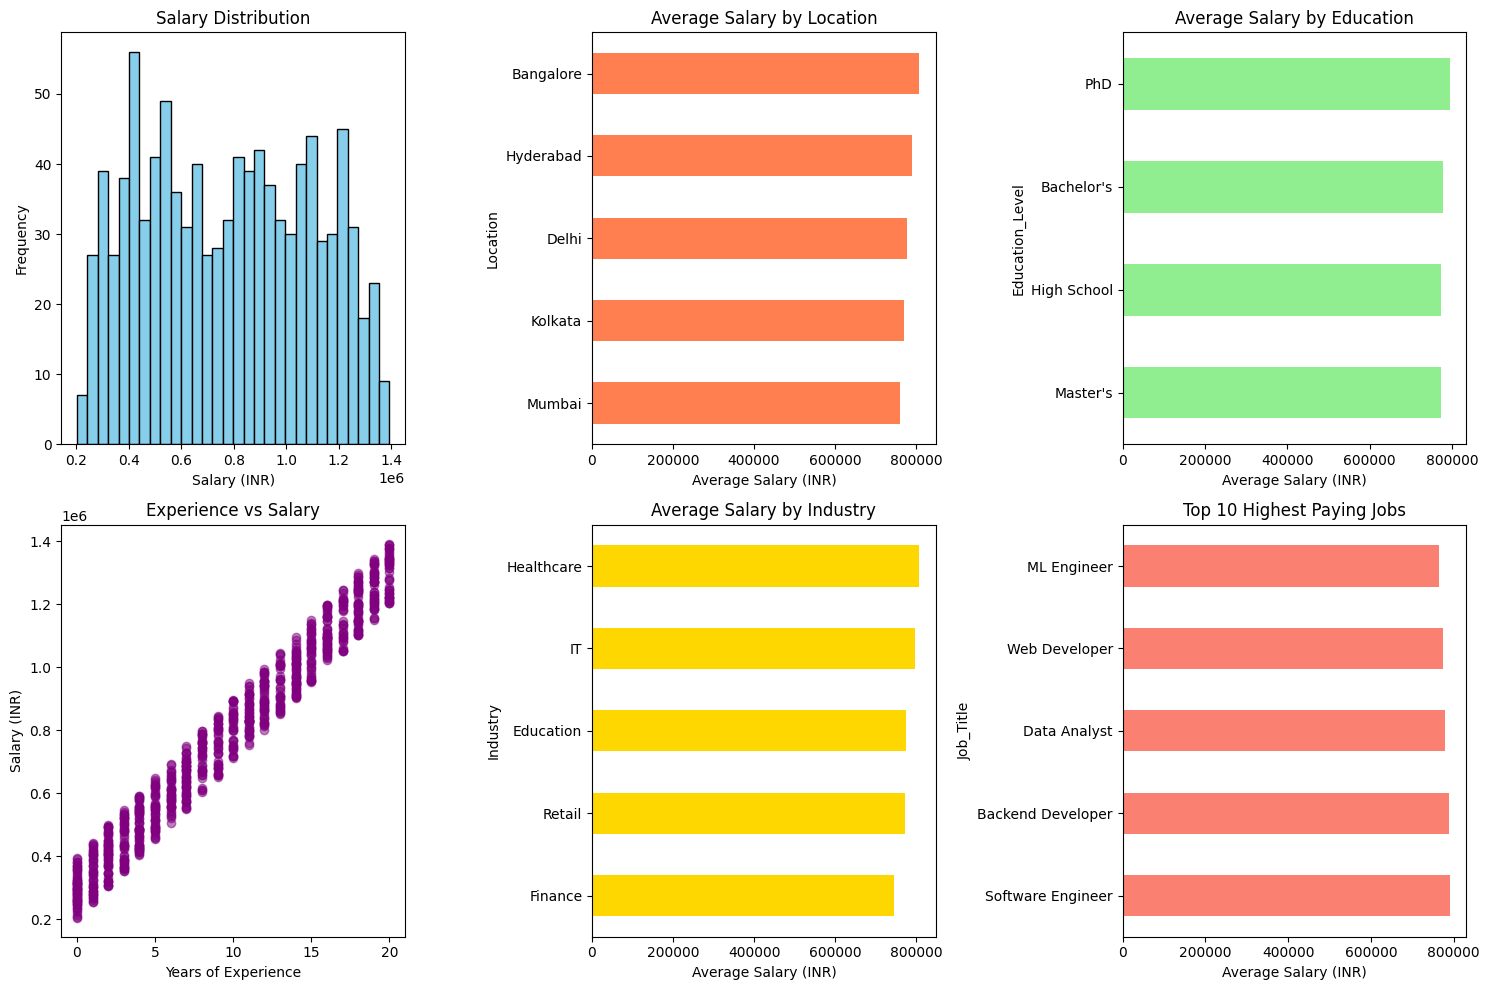

In [5]:
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
plt.hist(df['Salary_INR'],bins=30,color='skyblue',edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary (INR)')
plt.ylabel('Frequency')

plt.subplot(2,3,2)
df.groupby('Location')['Salary_INR'].mean().sort_values().plot(kind='barh',color='coral')
plt.title('Average Salary by Location')
plt.xlabel('Average Salary (INR)')

plt.subplot(2,3,3)
df.groupby('Education_Level')['Salary_INR'].mean().sort_values().plot(kind='barh',color='lightgreen')
plt.title('Average Salary by Education')
plt.xlabel('Average Salary (INR)')

plt.subplot(2,3,4)
plt.scatter(df['Years_of_Experience'],df['Salary_INR'],alpha=0.5,color='purple')
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (INR)')

plt.subplot(2,3,5)
df.groupby('Industry')['Salary_INR'].mean().sort_values().plot(kind='barh',color='gold')
plt.title('Average Salary by Industry')
plt.xlabel('Average Salary (INR)')

plt.subplot(2,3,6)
top_jobs = df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False).head(10)
top_jobs.plot(kind = 'barh',color = 'salmon')
plt.title('Top 10 Highest Paying Jobs')
plt.xlabel('Average Salary (INR)')

plt.tight_layout()
plt.savefig('salary_analysis.png',dpi=300,bbox_inches='tight')
plt.show()

### Step 4: Data Preprocessing and Encoding

In [6]:
df_encoded = df.copy()

label_encoders = {}
categorical_columns = ['Job_Title','Education_Level','Location','Industry']

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}:{len(le.classes_)} unique values")

print("\nEncoded dataset:")
print(df_encoded.head())

Job_Title:5 unique values
Education_Level:4 unique values
Location:5 unique values
Industry:5 unique values

Encoded dataset:
   Years_of_Experience  Job_Title  Education_Level  Location  Industry  \
0                    6          1                1         4         2   
1                   19          4                2         2         1   
2                   14          2                1         4         0   
3                   10          1                2         4         3   
4                    7          0                3         1         1   

   Salary_INR  
0      535554  
1     1196922  
2      913409  
3      736639  
4      744699  


### Step 5: Prepare Features and Target

In [7]:
X = df_encoded.drop('Salary_INR',axis=1)
y = df_encoded['Salary_INR']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Features: {list(X.columns)}")

Training set size: 800
Testing set size: 200
Features: ['Years_of_Experience', 'Job_Title', 'Education_Level', 'Location', 'Industry']


### Step 6: Train Individual Models

In [8]:
print("Training Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression trained")

print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest trained")

print("\nTraining Gradient Boosting Regressor...")
gb_model = GradientBoostingRegressor(n_estimators=100,random_state=42)
gb_model.fit(X_train,y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting trained")

Training Linear Regression Model...
Linear Regression trained

Training Random Forest Regressor...
Random Forest trained

Training Gradient Boosting Regressor...
Gradient Boosting trained


### Step 7: Create Voting Ensemble

In [9]:
print("Creating Voting Ensemble...")
voting_model = VotingRegressor(
    estimators=[
        ('lr',LinearRegression()),
        ('rf',RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)),
        ('gb',GradientBoostingRegressor(n_estimators=100,random_state=42))
    ]
)
voting_model.fit(X_train, y_train)
voting_pred = voting_model.predict(X_test)
print("Voting Ensemble trained")

Creating Voting Ensemble...
Voting Ensemble trained


### Step 8: Evaluate All Models

In [10]:
def evaluate_model(y_true,y_pred,model_name):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true,y_pred)

    print(f"\n{model_name} Performance:")
    print(f"  Mean Absolute Error (MAE): ₹{mae:,.2f}")
    print(f"  Root Mean Squared Error (RMSE): ₹{rmse:,.2f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Accuracy: {r2*100:.2f}%")

    return {'MAE':mae,'RMSE':rmse,'R2':r2}

results = {}
results['Linear Regression'] = evaluate_model(y_test,lr_pred,"Linear Regression")
results['Random Forest'] = evaluate_model(y_test,rf_pred,"Random Forest")
results['Gradient Boosting'] = evaluate_model(y_test,gb_pred,"Gradient Boosting")
results['Voting Ensemble'] = evaluate_model(y_test,voting_pred,"Voting Ensemble")


Linear Regression Performance:
  Mean Absolute Error (MAE): ₹49,834.48
  Root Mean Squared Error (RMSE): ₹57,234.19
  R² Score: 0.9684
  Accuracy: 96.84%

Random Forest Performance:
  Mean Absolute Error (MAE): ₹51,215.61
  Root Mean Squared Error (RMSE): ₹60,950.83
  R² Score: 0.9642
  Accuracy: 96.42%

Gradient Boosting Performance:
  Mean Absolute Error (MAE): ₹49,891.08
  Root Mean Squared Error (RMSE): ₹58,041.97
  R² Score: 0.9675
  Accuracy: 96.75%

Voting Ensemble Performance:
  Mean Absolute Error (MAE): ₹49,477.85
  Root Mean Squared Error (RMSE): ₹57,195.49
  R² Score: 0.9684
  Accuracy: 96.84%


### Step 9: Compare Model Performance


MODEL COMPARISON SUMMARY
                            MAE          RMSE        R2
Linear Regression  49834.476498  57234.188411  0.968398
Random Forest      51215.612348  60950.828384  0.964160
Gradient Boosting  49891.076509  58041.969769  0.967499
Voting Ensemble    49477.847664  57195.489739  0.968441 



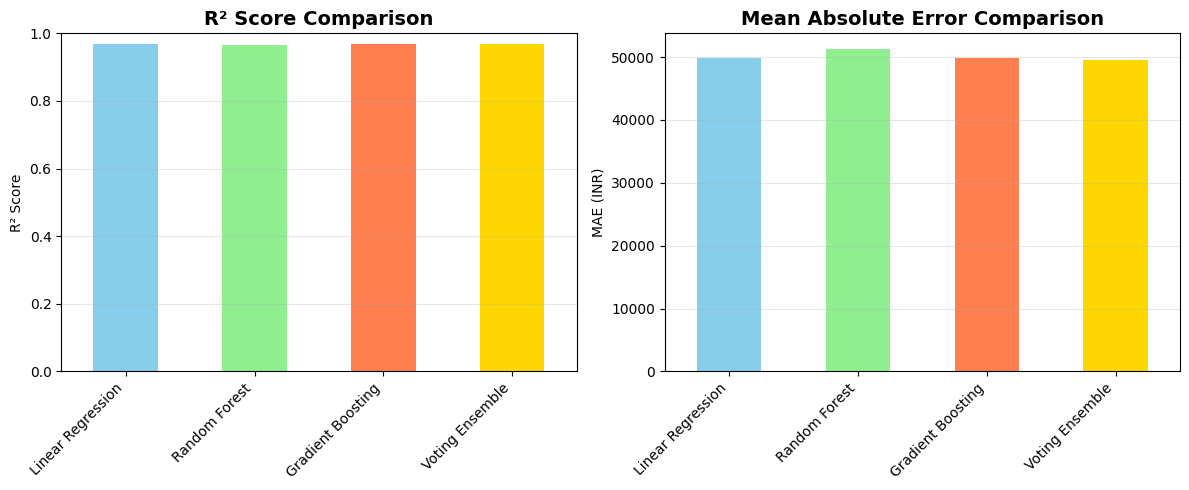

In [11]:
results_df = pd.DataFrame(results).T
print("\n"+"="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(results_df,"\n")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
results_df['R2'].plot(kind='bar',color=['skyblue','lightgreen','coral','gold'])
plt.title('R² Score Comparison',fontsize=14,fontweight='bold')
plt.ylabel('R² Score')
plt.xticks(rotation=45,ha='right')
plt.ylim(0,1)
plt.grid(axis='y',alpha=0.3)

plt.subplot(1,2,2)
results_df['MAE'].plot(kind='bar',color=['skyblue','lightgreen','coral','gold'])
plt.title('Mean Absolute Error Comparison',fontsize=14,fontweight='bold')
plt.ylabel('MAE (INR)')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png',dpi=300,bbox_inches='tight')
plt.show()

### Step 11: Test Predictions

In [12]:
print("\n"+"="*60)
print("SAMPLE PREDICTIONS")
print("="*60)

sample_indices = [0,10,20,30,40]
for idx in sample_indices:
    actual = y_test.iloc[idx]
    lr_prediction = lr_pred[idx]
    rf_prediction = rf_pred[idx]
    gb_prediction = gb_pred[idx]
    voting_prediction = voting_pred[idx]

    print(f"\nSample {idx+1}:")
    print(f"  Actual Salary: ₹{actual:,.0f}")
    print(f"  Linear Regression: ₹{lr_prediction:,.0f} (Error: ₹{abs(actual-lr_prediction):,.0f})")
    print(f"  Random Forest: ₹{rf_prediction:,.0f} (Error: ₹{abs(actual-rf_prediction):,.0f})")
    print(f"  Gradient Boosting: ₹{gb_prediction:,.0f} (Error: ₹{abs(actual-gb_prediction):,.0f})")
    print(f"  Voting Ensemble: ₹{voting_prediction:,.0f} (Error: ₹{abs(actual-voting_prediction):,.0f})")


SAMPLE PREDICTIONS

Sample 1:
  Actual Salary: ₹434,578
  Linear Regression: ₹493,936 (Error: ₹59,358)
  Random Forest: ₹499,522 (Error: ₹64,944)
  Gradient Boosting: ₹478,896 (Error: ₹44,318)
  Voting Ensemble: ₹490,785 (Error: ₹56,207)

Sample 11:
  Actual Salary: ₹302,975
  Linear Regression: ₹347,778 (Error: ₹44,803)
  Random Forest: ₹293,494 (Error: ₹9,481)
  Gradient Boosting: ₹333,652 (Error: ₹30,677)
  Voting Ensemble: ₹324,975 (Error: ₹22,000)

Sample 21:
  Actual Salary: ₹1,270,617
  Linear Regression: ₹1,240,072 (Error: ₹30,545)
  Random Forest: ₹1,232,127 (Error: ₹38,490)
  Gradient Boosting: ₹1,234,452 (Error: ₹36,165)
  Voting Ensemble: ₹1,235,550 (Error: ₹35,067)

Sample 31:
  Actual Salary: ₹1,017,229
  Linear Regression: ₹996,235 (Error: ₹20,994)
  Random Forest: ₹1,028,914 (Error: ₹11,685)
  Gradient Boosting: ₹981,020 (Error: ₹36,209)
  Voting Ensemble: ₹1,002,056 (Error: ₹15,173)

Sample 41:
  Actual Salary: ₹753,218
  Linear Regression: ₹802,543 (Error: ₹49,325)
 

### Salary Prediction From User Input

In [ ]:
def take_user_input_and_predict():
    print("Enter the following details:\n")

    job_title = input("Job Title: ")
    education = input("Education Level: ")
    location = input("Location: ")
    industry = input("Industry: ")
    experience = float(input("Years of Experience: "))

    user_data = {
        'Job_Title': job_title,
        'Education_Level': education,
        'Location': location,
        'Industry': industry,
        'Years_of_Experience': experience
    }

    encoded = []
    for col in ['Job_Title','Education_Level','Location','Industry']:
        if user_data[col] in label_encoders[col].classes_:
            encoded.append(label_encoders[col].transform([user_data[col]])[0])
        else:
            print(f"\nWARNING: '{user_data[col]}' not seen in training data.")
            print("Using default value 0.")
            encoded.append(0)

    encoded.append(user_data['Years_of_Experience'])

    input_array = np.array(encoded).reshape(1, -1)

    print("\n==============================")
    print("      SALARY PREDICTIONS       ")
    print("==============================")

    print(f"Linear Regression:      ₹{lr_model.predict(input_array)[0]:.2f}")
    print(f"Random Forest:           ₹{rf_model.predict(input_array)[0]:.2f}")
    print(f"Gradient Boosting:       ₹{gb_model.predict(input_array)[0]:.2f}")
    print(f"Voting Ensemble:         ₹{voting_model.predict(input_array)[0]:.2f}")

    print("==============================\n")

take_user_input_and_predict()


Enter the following details:



### Summary

**Models Trained:**
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. Voting Ensemble (combines all three)

The Linear Regression model is used in the frontend for predictions, while the ensemble methods help improve overall accuracy in the backend.